# Scikit-Learn

## Giriş

**Scikit-Learn**, Python için en çok kullanılan ve en kapsamlı yapay öğrenme kütüphanelerinden birisidir. Numpy, Matplotlib, Pandas gibi kütüphaneler ile entegre kullanılabilir. Bunun yanında derin öğrenme gibi eksik olduğu noktalarda diğer yapay öğrenme kütüphaneleri ile de iyi anlaşır. Genel olarak kullanımı kolaydır. Detaylar için: https://scikit-learn.org/

### Scikit-Learn içindeki Hazır Veri Setleri

Scikit-Learn içinde bir takım hazır veri seti vardır. Bu siteden detaylarına ulaşabilirsiniz: https://scikit-learn.org/stable/datasets/index.html. Bu veri setlerine ulaşmak için hazır işlevler mevcuttur. Veri setini, numpy arrayleri içeren, `Bunch` isimli bir veri yapısında yükler. Girdi ve hedef verilerine, köşeli parantez ile ulaşmak mümkündür.

In [1]:
%matplotlib inline
import numpy as np
from sklearn import datasets
iris_data = datasets.load_iris()
print('Scikit: ',type(iris_data))
print(dir(iris_data))

Scikit:  <class 'sklearn.utils.Bunch'>
['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


DESCR veri setini anlatan bilgiler içerir

In [2]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
print('Girdi: ', type(iris_data['data']))
print('Hedef: ', type(iris_data['target']))

Girdi:  <class 'numpy.ndarray'>
Hedef:  <class 'numpy.ndarray'>


In [4]:
print(iris_data['data'].shape, iris_data['target'].shape)

(150, 4) (150,)


In [5]:
print(iris_data['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
print(iris_data['target_names'])

['setosa' 'versicolor' 'virginica']


In [7]:
print(iris_data['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Estimator API: Tahminleyici Uygulama Programı Arayüzü

Scikit-Learn kütüphanesindeki bütün yapay öğrenme algoritmaları Estimator API kullanılarak yazılmıştır. Bu API sayesinde algoritmaları tutarlı bir şekilde kullanmak mümkündür. Bu APInin temel özelleklikleri anlaşıldıktan sonra, Scikit-Learn kütüphanesini kullanmak çok kolaydır. 

Bu APIyi kullanan bir algoritmayı kullanmak için genel olarak aşağıdaki adımlar izlenir:

1. Problemimize uygun yapay öğrenme modelini gerçekleştirecek `estimator` sınıfını `import` etmek
2. Modelin hiperparametrelerini belirlemek. (Daha sonra bu parametreleri nasıl seçeceğimizi göreceğiz)
3. Verilerimizi hazırlamak (Gözetimli öğrenme için girdi ve hedef verilerini, gözetimsiz öğrenme için doğrudan veriyi)
4. Modeli `fit()` fonksiyonunu çağırarak ile öğrenmek.
5. Yeni veri üzerinde çıkarım yapmak:
  * Gözetimli öğrenme için `predict()` fonksiyonunu çağırarak
  * Gözetimsiz öğrenme için, modele göre, `transform()` ya da `predict()` fonksiyonlarından birisini çağırarak.

Bu adımları bir doğrusal regresyon problemi üzerinden takip edelim. 

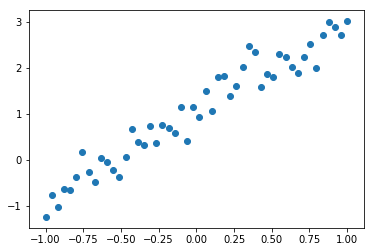

In [8]:
import matplotlib.pyplot as plt
x = np.linspace(-1,1,50)
y = 2*x+1 + np.random.normal(0,0.25,len(x))
plt.scatter(x,y)

1. Uygun modeli yüklemek. Bu örnek için "linear regression"

In [9]:
from sklearn.linear_model import LinearRegression

2. Hiperparametrelerimizi belirleyelim.

In [10]:
#Nelere ihtiyacımız görmek için:
from inspect import signature
print(signature(LinearRegression))
# Dökümantasyon için:
# print(help(LinearRegression))
model = LinearRegression(fit_intercept = True)

(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
Help on class LinearRegression in module sklearn.linear_model.base:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (e.g. data is expected to be already centered).
 |  
 |  normalize : boolean, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subtracting the mean and dividing by the l2-norm.
 |      If you wish to standardize, please use
 |      :class:`sklearn.preprocessing.StandardScaler` before calling ``fit`` on
 |      an 

3. Verimizi hazırlayalım. Scikit-Learn, girdileri 2 boyutlu, hedefleri de 1 boyutlu olarak bekliyor.

In [12]:
print(x.shape) #bir boyutlu
X = x[:,np.newaxis] #iki boyutlu yaptık, alternatif olarak X = x.reshape(len(x),1)
print(X.shape)

(50,)
(50, 1)


4. Öğrenelim

In [13]:
model.fit(X,y)
print('Öğrenilmiş Ağırlık: ', model.coef_)
print('Öğrenilmiş Kesim (intercept): ', model.intercept_)

Öğrenilmiş Ağırlık:  [1.92551778]
Öğrenilmiş Kesim (intercept):  1.066137892752497


5. Yeni veri gelince

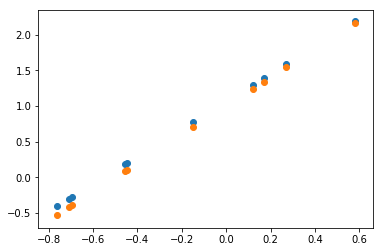

In [15]:
#-1 ve 1 arasında rastgele veri yaratalım
xnew = -1+2*np.random.rand(10)
ynew = model.predict(xnew[:,np.newaxis])
plt.scatter(xnew, ynew)
#Gercek model ile denemek istersek
#ytrue = 2*xnew+1
#plt.scatter(xnew,ytrue)

Geçtiğimiz örnek için orjinal verimiz ile modelin yakınlığına da bakabiliriz.

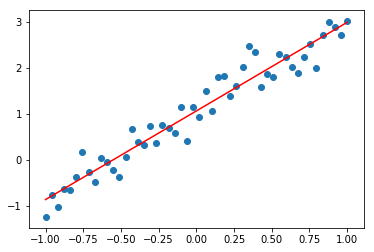

In [16]:
ypred = model.predict(X)
plt.scatter(X,y)
plt.plot(X,ypred,'r')

Grafik beklediğimiz üzere kötü durmuyor. Modelin sayısal performansına (örneğin: ortalama karesel hatasına) da bakabiliriz. Scikit-learn, `metrics` modulü ile bu konuda işlevsellik sağlıyor. (Değişik model performansları ve daha fazlası için: https://scikit-learn.org/stable/modules/model_evaluation.html)

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,ypred)

0.051693373482130295

Buraya kadar modelimizin eğitim kümesi üzerindeki performansına baktık. Ancak biliyoruz ki daha kapsamlı performans testleri gerekiyor.

## Performans Testleri

Yukarıda gördüğümüz adımlar, sürecin önemli iki kısmını atlıyor. Bunlardan birincisi, öğrenilen modelin performans testi, ikincisi ise doğru hiperparametre seçilmesi. 

Bunun için iris veri setimize geri dönelim ve algoritma olarak da Logistic Regression ile başlayalım.

In [17]:
from sklearn.linear_model import LogisticRegression
#print(signature(LogisticRegression))
#Şimdilik varsayılan hiperparametre değerleri ile devam edelim.
#Sadece iterasyon sayısını arttırıyoruz ve uyarıları bastırmak için iki parametre veriyoruz
#Sorun varsa multi_class = 'ovr'
logregModel = LogisticRegression(multi_class = 'auto', solver ='lbfgs', max_iter = 1000) 
X = iris_data['data']
y = iris_data['target']
logregModel.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

Modelin öğrenme performansına bakalım. (Uyarı: Veriyi henüz eğitim kümesi, validasyon kümesi ve test kümesi diye ayırmadık).

In [18]:
from sklearn.metrics import accuracy_score
ypred = logregModel.predict(X)
accuracy_score(y, ypred)


0.9733333333333334

Bütün veri seti ile öğrenme performansı iyi ancak modeli görmediğimiz veri üzerinde denememiz gerekli. Scikit-learn, veriyi ayırmak için işlevsellik sağlıyor. `train_test_split` sınıfına `test_size` parametresi vererek ayırma oranlarını belirleniyor.

In [19]:
#model_selection çalışmaz ise cross_validation
from sklearn.model_selection import train_test_split
#Hep aynı şekilde ayırması için random seed belirliyoruz. 
#Bu şart değil ama geliştirme aşamasında faydalı
#80%-20% ayırırsak 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, 
                                                random_state = 12)
logregModel.fit(Xtrain,ytrain)
ypred = logregModel.predict(Xtest)
accuracy_score(ytest,ypred)

0.9666666666666667

Bildiğimiz üzere, tek bir test her zaman en sağlıklı yaklaşım değil. Örneğin:

In [20]:
from sklearn.model_selection import train_test_split
#Hep aynı şekilde ayırması için random seed belirliyoruz. Bu şart değil ama geliştirme aşamasında faydalı
#80%-20% ayırırsak 
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, 
                                                random_state = 12321)
logregModel.fit(Xtrain,ytrain)
ypred = logregModel.predict(Xtest)
accuracy_score(ytest,ypred)

1.0

Bu yüzden çapraz geçerlilik (cross-validation) yaklaşımını kullanıyoruz. Scikit-learn kütüphanesindeki `cross_val_score` sınıfı bu işlevselliği sağlıyor.

In [21]:
from sklearn.model_selection import cross_val_score
crossValScores = cross_val_score(logregModel, X, y, cv=5)
print('Değerler: ', crossValScores)
print('Ortalama (2 standart sapma): %0.2f (+/- %0.2f)' 
      % (crossValScores.mean(), crossValScores.std() * 2))

Değerler:  [0.96666667 1.         0.93333333 0.96666667 1.        ]
Ortalama (2 standart sapma): 0.97 (+/- 0.05)


Çapraz geçerlilik sırasında rastgele bölmek önemli. Bunun için `ShuffleSplit` ve `KFold` sınıflarını kullanıyoruz. ShuffleSplit, veriyi, belirlenen **orana** göre verilen sayı kadar rastgele ayırıyor. KFold, (shuffle=True iken), veriyi karıştırdıktan sonra verilen sayı kadar parçaya bölüyor.

In [22]:
from sklearn.model_selection import ShuffleSplit, KFold

#Rastgele davranışını temizle
import time
np.random.seed(int(time.time()))

#Rastgele 5 parçaya bölmek için:
cv = ShuffleSplit(n_splits=5, test_size=0.25)
print('Her seferinde rastgele bölünce: ')
print(cross_val_score(logregModel, X, y, cv=cv))
#Rastgele karıştırıp düzenli 5 parçaya bölmek için
cv = KFold(n_splits=5, shuffle=True)
print('Bir kere rastgele karıştırıp düzenli bölünce:')
print(cross_val_score(logregModel, X, y, cv=cv))

Her seferinde rastgele bölünce: 
[0.97368421 0.94736842 0.97368421 0.94736842 1.        ]
Bir kere rastgele karıştırıp düzenli bölünce:
[1.         0.93333333 1.         0.9        1.        ]


Bu örnek için olmasa da birçok veri setinde, sınıfların dağılım oranı farklı olabilir. Performans ölçerken buna dikkat etmemiz gerekli. Bunun için, yukarıdaki sınıfların *Stratified* versiyonları da var.

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold

np.random.seed(int(time.time()))

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25)
print('Sınıf dağılımına göre dağıtınca:')
print(cross_val_score(logregModel, X, y, cv=cv))

cv = StratifiedKFold(n_splits=5, shuffle=True)
print('Sınıf dağılımına göre dağıtınca:')
print(cross_val_score(logregModel, X, y, cv=cv))

Sınıf dağılımına göre dağıtınca:
[0.97368421 0.92105263 0.94736842 1.         1.        ]
Sınıf dağılımına göre dağıtınca:
[1.         1.         0.96666667 0.9        1.        ]


Bir başka çapraz geçerlilik yöntemi ise her seferinde sadece bir veri noktasını test olarak ayırarak denemektir:

In [25]:
from sklearn.model_selection import LeaveOneOut
cv = LeaveOneOut()
scores = cross_val_score(logregModel, X, y, cv=cv)
print(scores.mean())

0.9666666666666667


##  Hiperparametre Seçimi

Buraya kadar performans testi yaptık. Ancak bu testler sabit hiperparametre seçimleri için geçerliydi. Scikit-learn bunu yapmak için iki temel işlevsellik sunuyor:
1. Grid Taraması: Verilen hiperparametre değerlerinin bütün kombinasyonlarının denenmesi ve verilen performans testine göre en iyi kombinasyonun bulunması. `GridSearchCV`
2. Rastgele Tarama: Verilen hiperparametre dağılımlarından belirlenen sayıda örneklem alınarak denenmesi ve verilen performans testine göre en iyi kombinasyonun bulunması. `RandomizedSearchCV`

İlk olarak Grid Taraması ile başlayalım. Logistic regression algoritmasının en temel hiperparametresi, regularizasyon ağırlığı. Bunu `C` ile belirliyoruz. Bu parametre, regülarizasyon ağırlığı ile ters orantılı (düşük C ==> yüksek regülarizasyon). 


In [29]:
from sklearn.model_selection import GridSearchCV

np.random.seed(int(time.time()))
#Belirlediğimiz performans testi
cv=StratifiedKFold(n_splits=5, shuffle=True)
paramsToTest = {'C':[0.1,0.5,1.0,2.5,5.0]}
gscv = GridSearchCV(LogisticRegression(multi_class = 'auto', solver ='lbfgs', 
                                       max_iter = 1000), 
                    paramsToTest, cv=cv,return_train_score=True)
gscv.fit(X,y)
print('En iyi C: ',  gscv.best_estimator_.C)

En iyi C:  1.0


En iyi hiperparametre setini bulduktan sonra bütün veri ve bu parametre seti ile tekrar modeli öğreniyor. Bu `refit` değişkeni ile ayarlanıyor (varsayılan True). Hiperparametre seçim işleminin istatistiklerine `gscv.cv_results_` yapısı üzerinden erişmek mümkün. 

In [30]:
sorted(gscv.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'mean_train_score',
 'param_C',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split0_train_score',
 'split1_test_score',
 'split1_train_score',
 'split2_test_score',
 'split2_train_score',
 'split3_test_score',
 'split3_train_score',
 'split4_test_score',
 'split4_train_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score',
 'std_train_score']

Sadece bir kısmına bakacak olursak:

In [31]:
print(gscv.cv_results_['params'])
print(gscv.cv_results_['mean_test_score'])
print(gscv.cv_results_['std_test_score'])

[{'C': 0.1}, {'C': 0.5}, {'C': 1.0}, {'C': 2.5}, {'C': 5.0}]
[0.96       0.96666667 0.97333333 0.97333333 0.96666667]
[0.03265986 0.02108185 0.02494438 0.02494438 0.03651484]


Bu değerleri kullanarak validasyon eğrileri çizdirmek ve görsel olarak sonuçları sunmak mümkün. Bunun yanında scikit-learn `validation_curve` adı altında benzer bir işlevsellik sunuyor. Bu fonksiyona regresyonda tekrar bakacağız.

Rastgele tarama için liste olarak değerlere ek olarak değerler üzerinden bir dağılım da belirtilebilir. Liste kullanılırsa, bu listeden rastgele örneklem alınıyor. Eğer bir dağılım belirtilmişse, buna göre örneklem alınıyor. Bunun için dağılımların `rvs` metodu ile örneklem sağlamaları gerekli. `scipy.stats` modülündeki dağılımlar bunu sağlıyor ancak kendimiz de gerekirse yazabiliriz. Ek olarak, kaç adet örneklem alınacağının `n_iter` ile belirtilmesi lazım.

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_uniform 

np.random.seed(int(time.time()))
#Belirlediğimiz performans testi
cv=StratifiedKFold(n_splits=5, shuffle=True)
paramsToTest = {'C':np.arange(0.1,5.1,0.1)}
rscv = RandomizedSearchCV(LogisticRegression(multi_class = 'auto', 
                                             solver ='lbfgs', max_iter = 1000), 
                          paramsToTest, cv=cv, n_iter=10)
rscv.fit(X,y)
print('En iyi C: ',  rscv.best_estimator_.C)

paramsToTest = {'C': sp_uniform(0.1,4.9) }
rscv = RandomizedSearchCV(LogisticRegression(multi_class = 'auto', 
                                             solver ='lbfgs', max_iter = 1000), 
                          paramsToTest, cv=cv, n_iter=10)
rscv.fit(X,y)
print('En iyi C: ',  rscv.best_estimator_.C)

En iyi C:  1.9000000000000001
En iyi C:  2.1381611946680836


## Model Değerlendirmesi

Performans testlerini ve hiperparametre seçimlerini gördük. Şimdi baştan sona birleştirelim. Bunu anlatmak için scikit-learn kaynaklarından bir resim kullanırsak:

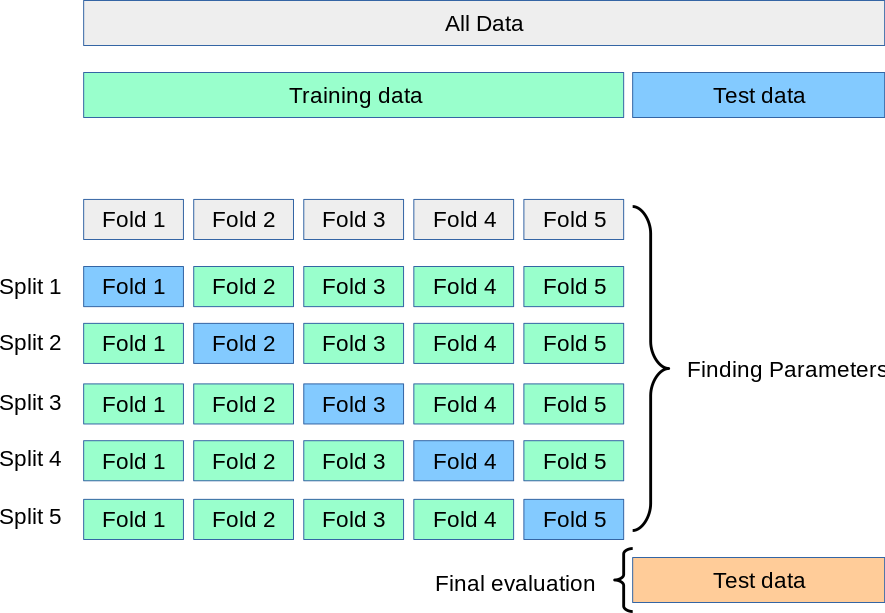

İyice emin olmak için, bu adım da rastgele birden fazla kere çalıştırılmalıdır.

Logistic Regression Modelini değerlendirmek için:
* Bütün veriyi 60%-40% eğitim-test kümesi olarak ayırmak
* Eğitim kümesinden öğrenilenleri, 3'lü çapraz geçerlilik kullanarak ölçmek
* Hiperparametre bulmak için 0.1 ve 5 arasında rastgele 10 değer seçmek.
* En sonunda seçilen hiperparametre ile bütün eğitim kümesinini kullanarak öğrenmek
* Test kümesini kullanarak son modelin performansını değerlendirmek

(Uyarı: Bu adımlar kompleks modeller ve/veya çok büyük veri setleri için zaman sorunlarından ötürü uygulanamayabilirler.)

Seçilen C:  3.759699901514323
0.9666666666666667
[[20  0  0]
 [ 0 18  0]
 [ 0  2 20]]


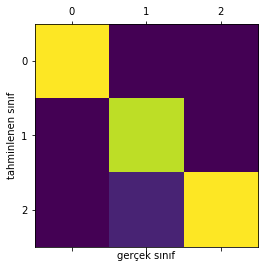

In [29]:
#Sıfırdan yazacak olursak
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from scipy.stats import uniform as sp_uniform

#Veriyi yükle
iris_data = datasets.load_iris()
y = iris_data['target']
X = iris_data['data']

#Veriyi ayır. Burada ayırırken sınıf oranlarını koruyoruz (stratify=y)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.4, 
                                                stratify=y)

#Çapraz geçerlilik yaklaşımını ayarla
cv=StratifiedKFold(n_splits=3, shuffle=True)

#Eğitim kümesi üzerinden hiperparametre taramasını ayarla
paramsToTest = {'C': sp_uniform(0.1,4.9)}
rscv = RandomizedSearchCV(LogisticRegression(multi_class = 'auto', solver ='lbfgs', max_iter = 1000),
                          paramsToTest, cv=cv, n_iter=10, iid=True)

#Taramayı başlat ve seç
rscv.fit(Xtrain,ytrain)
print('Seçilen C: ', rscv.best_estimator_.C)

#Bu noktada rscv.best_estimator_ bütün eğitim kümesi ile öğrenilmiş modeli barındırıyor. 
#Ancak rscv üzerinden doğrudan predict fonksiyonunu çağırmak mümkün
# Performans test etmek için:
ypred = rscv.predict(Xtest)
print(accuracy_score(ypred,ytest))

# Hata matrisine de bakacak olursak
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ypred, ytest)
print(mat)
plt.matshow(mat)
plt.xlabel('gerçek sınıf')
plt.ylabel('tahminlenen sınıf');
plt.show()